In [126]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [127]:
ds = datasets.load_boston()

In [128]:
X = ds.data
Y = ds.target

In [129]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [130]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X_train_scaled = scaler.fit_transform(X_train)

In [131]:
X_embedded = TSNE(n_components=2, learning_rate=250, random_state=42).fit_transform(X_train_scaled)

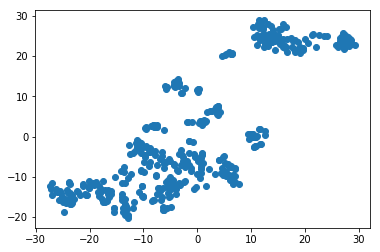

In [132]:
plt.scatter(X_embedded[:,0], X_embedded[:,1])
plt.show()

In [133]:
from sklearn.cluster import KMeans

In [134]:
model = KMeans(n_clusters=3, random_state=42, max_iter=100)
model.fit(X_embedded)
centers = model.cluster_centers_

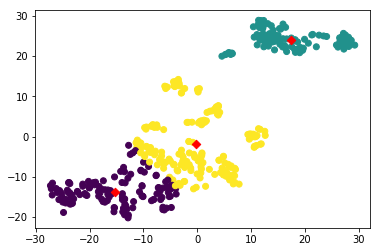

In [135]:
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=model.labels_)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')
plt.show()

In [136]:
pdf = pd.DataFrame(X_train, columns=ds.feature_names)

pdf['label'] = model.labels_
pdf['PRICE'] = Y_train

In [137]:
pdf.groupby(['label'])['PRICE', 'CRIM'].mean()

,PRICE,CRIM
label,,
0,26.541085,0.093354
1,16.277228,13.179822
2,23.804598,0.660240


In [138]:
# мы видим, что самая низкая цена там, где наибольший показатель криминальности
# и наоборот, в местах с наименьшим показателем криминальности цена более высокая